# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [358]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [359]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [360]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [361]:
for i in range (len(df["Country"])):
    print(df.loc[[i]].isna().sum().sum())

0
0
0
3
3
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
3
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
5
0
4
0
0
3
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
1
1
0
1
0
0
0
0
0
1
0
0
0
0
7
0
0
1
3
0
4
1
0
0
4
1
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
4
0
0
4
0
0
4
0
0
0
3
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
3
1
0
0
0
0
0
0
0
0
0
0
1
7
1
9
0
0
0


In [362]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [363]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- object data type for numirical values          <br>
2- null values          <br>
3- commas insted of dots          <br>
4- catigorical data

In [364]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [365]:
for i in range (len(df_copy["Country"])):
    if df_copy.loc[[i]].isna().sum().sum() >=5 :
        df_copy.drop(index=i, axis=1, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             223 non-null    object 
 1   Region                              223 non-null    object 
 2   Population                          223 non-null    int64  
 3   Area (sq. mi.)                      223 non-null    int64  
 4   Pop. Density (per sq. mi.)          223 non-null    object 
 5   Coastline (coast/area ratio)        223 non-null    object 
 6   Net migration                       222 non-null    object 
 7   Infant mortality (per 1000 births)  222 non-null    object 
 8   GDP ($ per capita)                  223 non-null    float64
 9   Literacy (%)                        208 non-null    object 
 10  Phones (per 1000)                   220 non-null    object 
 11  Arable (%)                          222 non-n

In [366]:
#solution 
df_copy['Coastline (coast/area ratio)'
]=df_copy['Coastline (coast/area ratio)'
].str.replace(',','.')
df_copy['Pop. Density (per sq. mi.)'
]=df_copy['Pop. Density (per sq. mi.)'
].str.replace(',','.')
df_copy['Net migration'
]=df_copy['Net migration'
].str.replace(',','.')
df_copy['Infant mortality (per 1000 births)'
]=df_copy['Infant mortality (per 1000 births)'
].str.replace(',','.')
df_copy['Literacy (%)'
]=df_copy['Literacy (%)'
].str.replace(',','.')
df_copy['Phones (per 1000)'
]=df_copy['Phones (per 1000)'
].str.replace(',','.')
df_copy['Arable (%)'
]=df_copy['Arable (%)'
].str.replace(',','.')
df_copy['Crops (%)'
]=df_copy['Crops (%)'
].str.replace(',','.')
df_copy['Other (%)'
]=df_copy['Other (%)'
].str.replace(',','.')
df_copy['Climate'
]=df_copy['Climate'
].str.replace(',','.')
df_copy['Birthrate'
]=df_copy['Birthrate'
].str.replace(',','.')
df_copy['Deathrate'
]=df_copy['Deathrate'
].str.replace(',','.')
df_copy['Agriculture'
]=df_copy['Agriculture'
].str.replace(',','.')
df_copy['Industry'
]=df_copy['Industry'
].str.replace(',','.')
df_copy['Service'
]=df_copy['Service'
].str.replace(',','.')

In [367]:
#test 
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10,15,75,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0,97.78,3,8.71,6.25,NaN,NaN,NaN


In [368]:
df_copy['Coastline (coast/area ratio)'
]=df_copy['Coastline (coast/area ratio)'
].astype(float)
df_copy['Pop. Density (per sq. mi.)'
]=df_copy['Pop. Density (per sq. mi.)'
].astype(float)
df_copy['Net migration'
]=df_copy['Net migration'
].astype(float)
df_copy['Infant mortality (per 1000 births)'
]=df_copy['Infant mortality (per 1000 births)'
].astype(float)
df_copy['Literacy (%)'
]=df_copy['Literacy (%)'
].astype(float)
df_copy['Phones (per 1000)'
]=df_copy['Phones (per 1000)'
].astype(float)
df_copy['Arable (%)'
]=df_copy['Arable (%)'
].astype(float)
df_copy['Crops (%)'
]=df_copy['Crops (%)'
].astype(float)
df_copy['Other (%)'
]=df_copy['Other (%)'
].astype(float)
df_copy['Climate'
]=df_copy['Climate'
].astype(float)
df_copy['Birthrate'
]=df_copy['Birthrate'
].astype(float)
df_copy['Deathrate'
]=df_copy['Deathrate'
].astype(float)
df_copy['Agriculture'
]=df_copy['Agriculture'
].astype(float)
df_copy['Industry'
]=df_copy['Industry'
].astype(float)
df_copy['Service'
]=df_copy['Service'
].astype(float)

In [369]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             223 non-null    object 
 1   Region                              223 non-null    object 
 2   Population                          223 non-null    int64  
 3   Area (sq. mi.)                      223 non-null    int64  
 4   Pop. Density (per sq. mi.)          223 non-null    float64
 5   Coastline (coast/area ratio)        223 non-null    float64
 6   Net migration                       222 non-null    float64
 7   Infant mortality (per 1000 births)  222 non-null    float64
 8   GDP ($ per capita)                  223 non-null    float64
 9   Literacy (%)                        208 non-null    float64
 10  Phones (per 1000)                   220 non-null    float64
 11  Arable (%)                          222 non-n

**Second issue**

In [370]:
#solution 
df_copy['Service'] = df_copy['Service'].replace(np.nan, 0)
df_copy['Industry'] = df_copy['Industry'].replace(np.nan, 0)
df_copy['Agriculture'] = df_copy['Agriculture'].replace(np.nan, 0)
df_copy["Deathrate"] = df_copy["Deathrate"].fillna(df_copy["Deathrate"].median())
df_copy["Birthrate"] = df_copy["Birthrate"].fillna(df_copy["Birthrate"].median())

In [371]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             223 non-null    object 
 1   Region                              223 non-null    object 
 2   Population                          223 non-null    int64  
 3   Area (sq. mi.)                      223 non-null    int64  
 4   Pop. Density (per sq. mi.)          223 non-null    float64
 5   Coastline (coast/area ratio)        223 non-null    float64
 6   Net migration                       222 non-null    float64
 7   Infant mortality (per 1000 births)  222 non-null    float64
 8   GDP ($ per capita)                  223 non-null    float64
 9   Literacy (%)                        208 non-null    float64
 10  Phones (per 1000)                   220 non-null    float64
 11  Arable (%)                          222 non-n

In [372]:
df_copy["Climate"].unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

In [373]:
df_copy["Climate"].fillna(5, inplace=True)

In [374]:
df_copy["Net migration"] = df_copy["Net migration"].fillna(df_copy["Net migration"].median())
df_copy["Infant mortality (per 1000 births)"] = df_copy["Infant mortality (per 1000 births)"].fillna(df_copy["Infant mortality (per 1000 births)"].median())

In [375]:
df_copy['Literacy (%)'] = df_copy["Literacy (%)"].fillna(df_copy["Literacy (%)"].median())
df_copy["Phones (per 1000)"] = df_copy["Phones (per 1000)"].fillna(df_copy["Phones (per 1000)"].median())
df_copy["Arable (%)"] = df_copy["Arable (%)"].fillna(df_copy["Arable (%)"].median())
df_copy["Crops (%)"] = df_copy["Crops (%)"].fillna(df_copy["Crops (%)"].median())
df_copy["Other (%)"] = df_copy["Other (%)"].fillna(df_copy["Other (%)"].median())

In [376]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             223 non-null    object 
 1   Region                              223 non-null    object 
 2   Population                          223 non-null    int64  
 3   Area (sq. mi.)                      223 non-null    int64  
 4   Pop. Density (per sq. mi.)          223 non-null    float64
 5   Coastline (coast/area ratio)        223 non-null    float64
 6   Net migration                       223 non-null    float64
 7   Infant mortality (per 1000 births)  223 non-null    float64
 8   GDP ($ per capita)                  223 non-null    float64
 9   Literacy (%)                        223 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          223 non-n

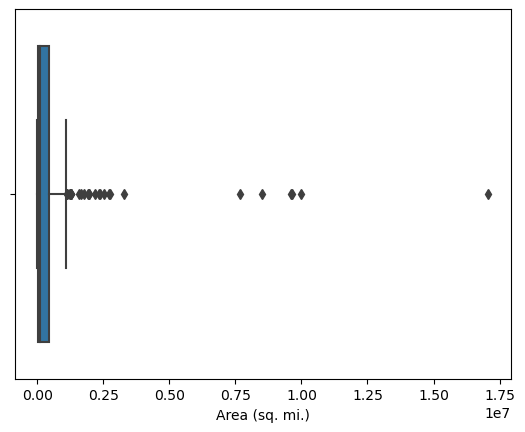

<AxesSubplot:xlabel='Pop. Density (per sq. mi.)'>

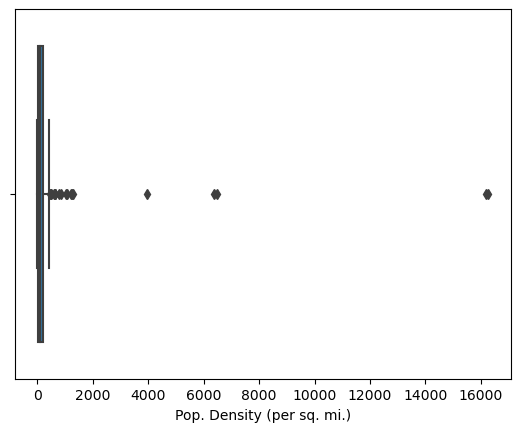

In [377]:
sns.boxplot(df_copy["Area (sq. mi.)"])
plt.show()
sns.boxplot(df_copy["Pop. Density (per sq. mi.)"])


In [378]:
for x in ['Area (sq. mi.)']:
    q75,q25 = np.percentile(df_copy.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = (q75+(1.5*intr_qr))*2
    min = (q25-(1.5*intr_qr))*2
 
    df_copy.loc[df_copy[x] < min,x] = np.nan
    df_copy.loc[df_copy[x] > max,x] = np.nan

In [379]:
for x in ['Coastline (coast/area ratio)']:
    q75,q25 = np.percentile(df_copy.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = (q75+(1.5*intr_qr))*2
    min = (q25-(1.5*intr_qr))*2
 
    df_copy.loc[df_copy[x] < min,x] = np.nan
    df_copy.loc[df_copy[x] > max,x] = np.nan

In [380]:
df_copy= df_copy.dropna(axis = 0)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             185 non-null    object 
 1   Region                              185 non-null    object 
 2   Population                          185 non-null    int64  
 3   Area (sq. mi.)                      185 non-null    float64
 4   Pop. Density (per sq. mi.)          185 non-null    float64
 5   Coastline (coast/area ratio)        185 non-null    float64
 6   Net migration                       185 non-null    float64
 7   Infant mortality (per 1000 births)  185 non-null    float64
 8   GDP ($ per capita)                  185 non-null    float64
 9   Literacy (%)                        185 non-null    float64
 10  Phones (per 1000)                   185 non-null    float64
 11  Arable (%)                          185 non-n

In [381]:
for x in ['Pop. Density (per sq. mi.)']:
    q75,q25 = np.percentile(df_copy.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = (q75+(1.5*intr_qr))*2
    min = (q25-(1.5*intr_qr))*2
 
    df_copy.loc[df_copy[x] < min,x] = np.nan
    df_copy.loc[df_copy[x] > max,x] = np.nan

In [382]:
df_copy.dropna(inplace=True)

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [383]:
from sklearn import preprocessing


In [384]:
scaled_df = df_copy.drop(columns=["Country","Region"])
scaled_df.info()
# i will use robust scaling to deal with outliears

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          181 non-null    int64  
 1   Area (sq. mi.)                      181 non-null    float64
 2   Pop. Density (per sq. mi.)          181 non-null    float64
 3   Coastline (coast/area ratio)        181 non-null    float64
 4   Net migration                       181 non-null    float64
 5   Infant mortality (per 1000 births)  181 non-null    float64
 6   GDP ($ per capita)                  181 non-null    float64
 7   Literacy (%)                        181 non-null    float64
 8   Phones (per 1000)                   181 non-null    float64
 9   Arable (%)                          181 non-null    float64
 10  Crops (%)                           181 non-null    float64
 11  Other (%)                           181 non-n

In [385]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()


In [386]:
for col in scaled_df:
        scaled_df[col] = pd.DataFrame(robust_scaler.fit_transform(pd.DataFrame(scaled_df[col])),columns=[col])

In [387]:
scaled_df.dropna(inplace=True, axis= 0)
scaled_df.isna().sum()

Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

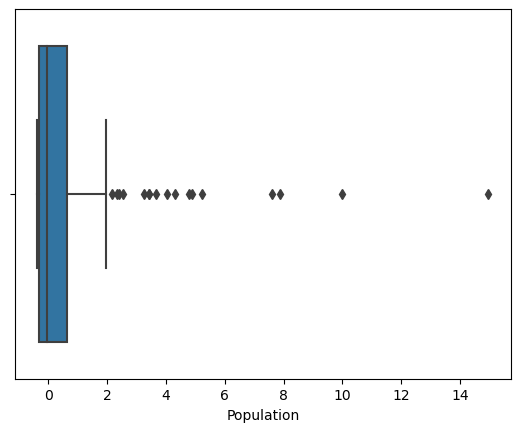

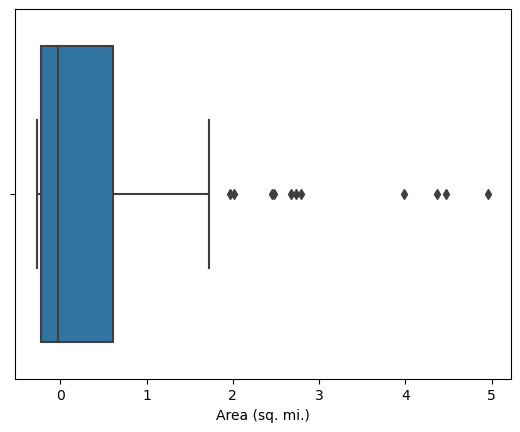

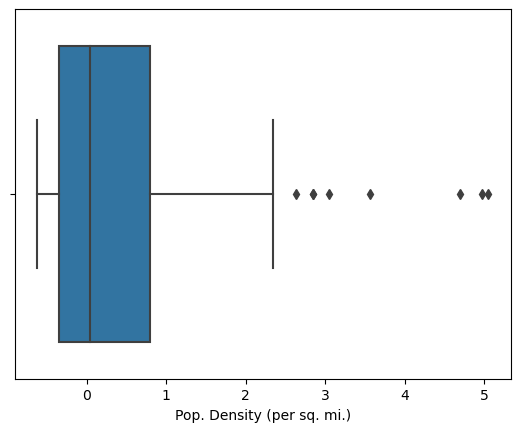

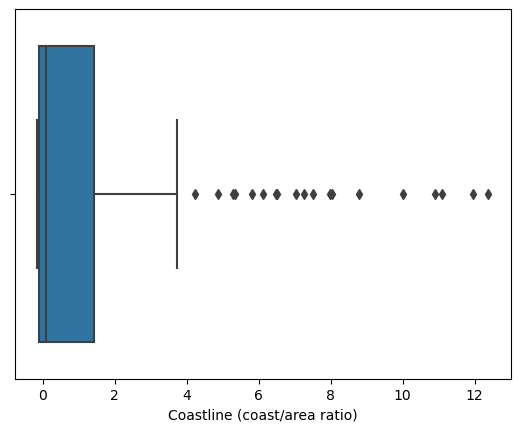

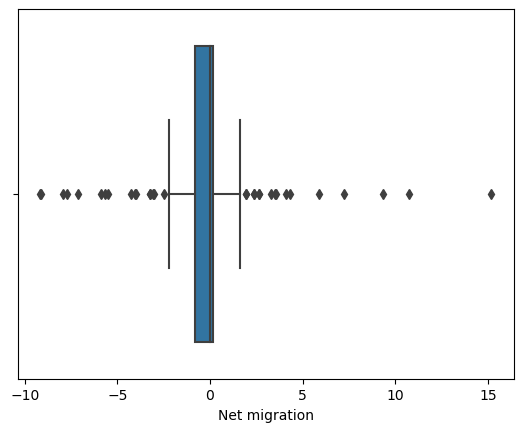

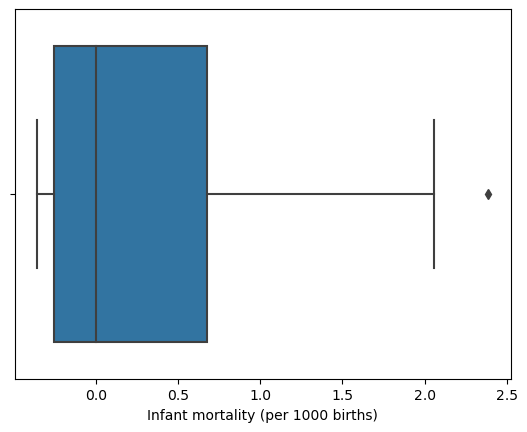

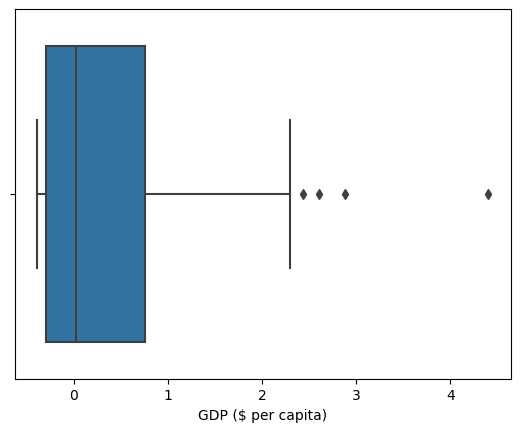

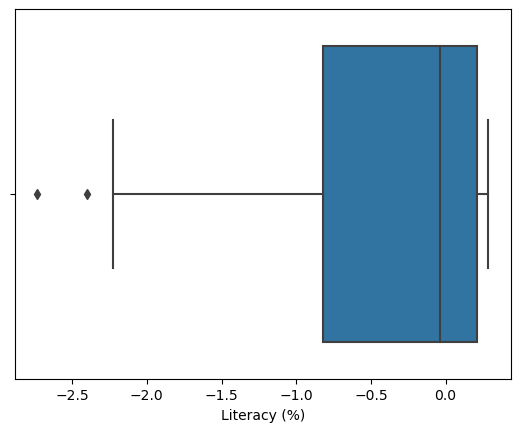

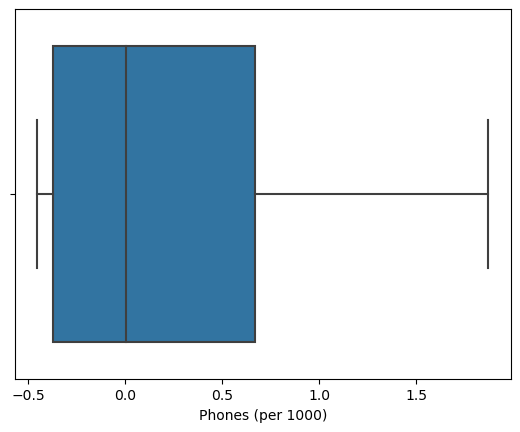

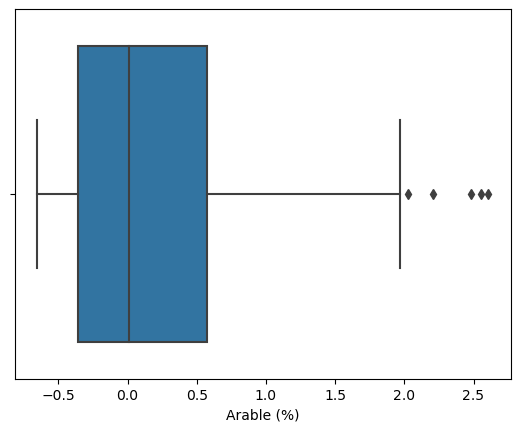

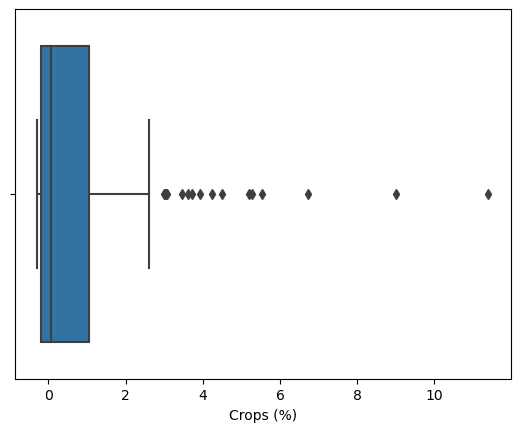

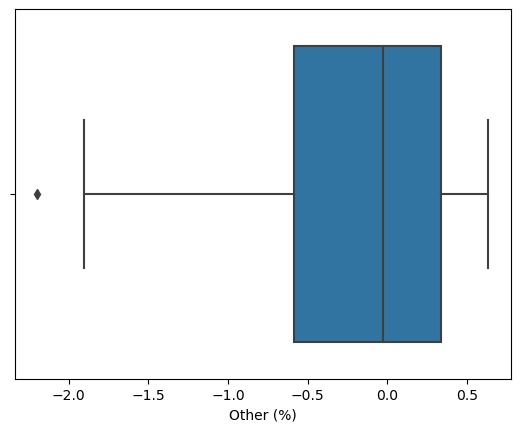

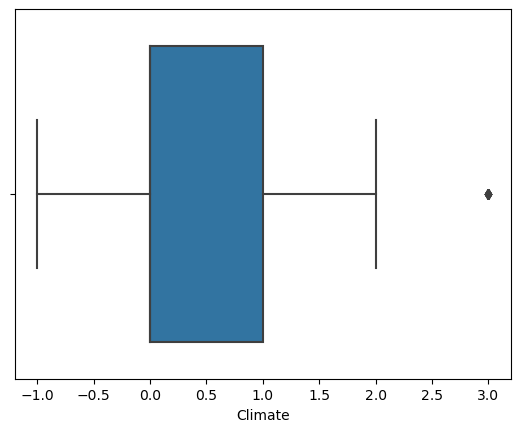

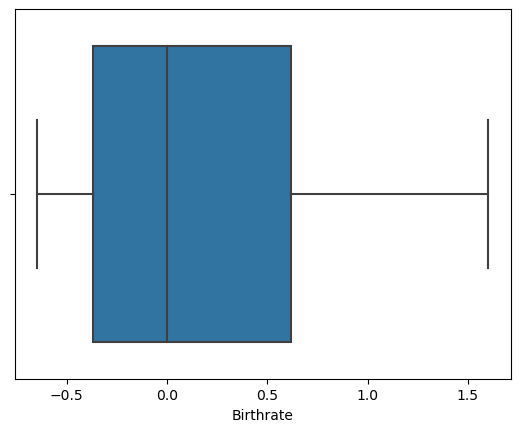

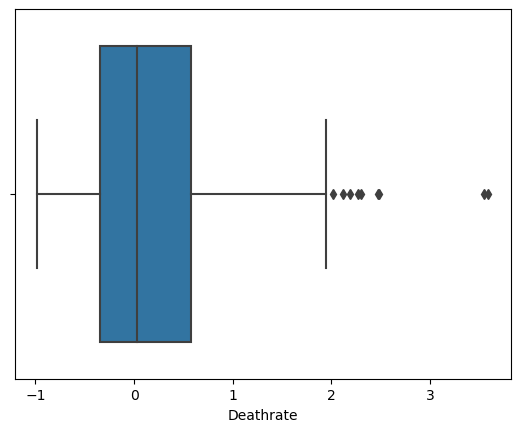

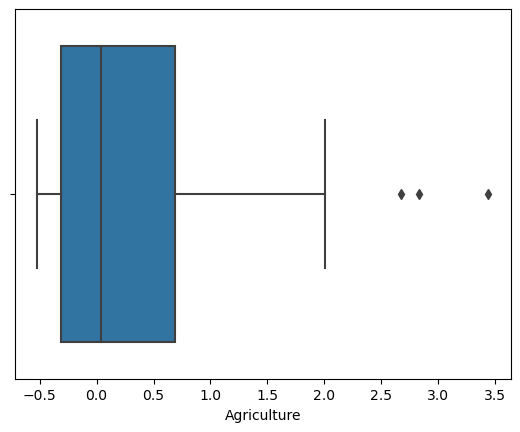

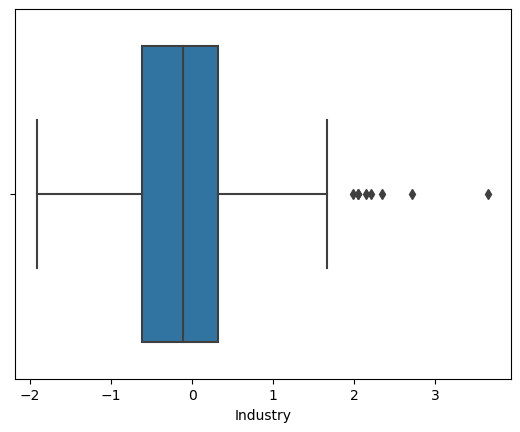

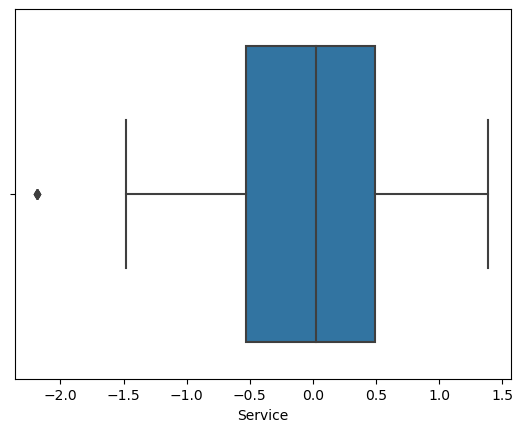

In [388]:
for c in scaled_df.columns.values:
    sns.boxplot(scaled_df[c])
    plt.show()


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

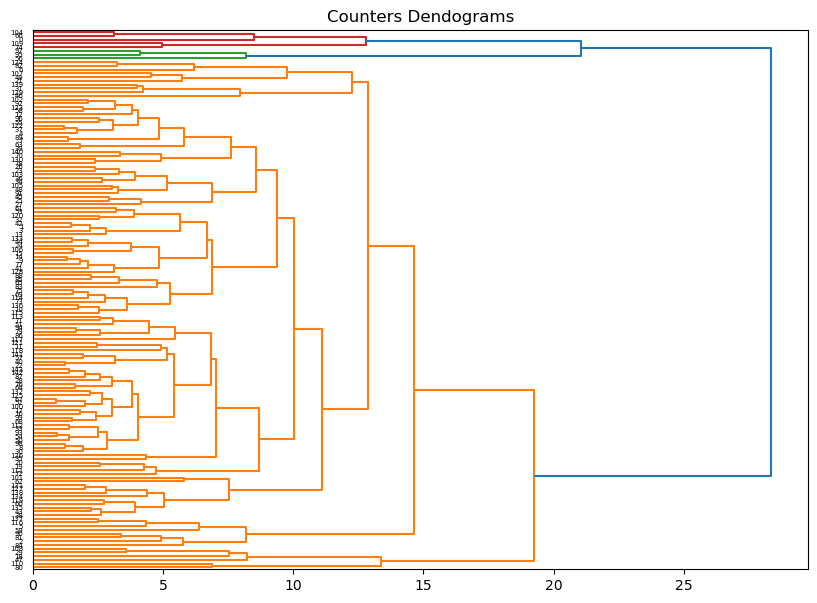

In [389]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= scaled_df , method = "complete" ,metric="euclidean" ),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

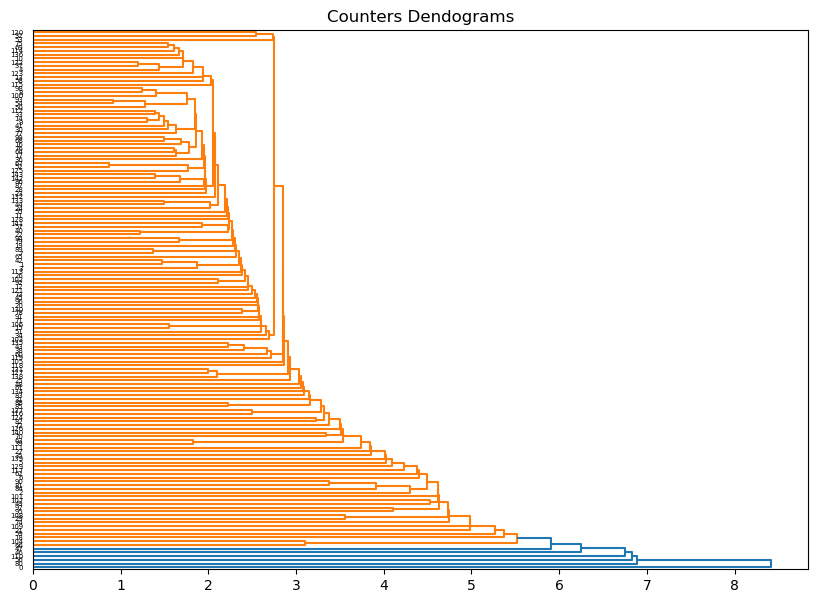

In [390]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= scaled_df , method = "single" ,metric="euclidean" ),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

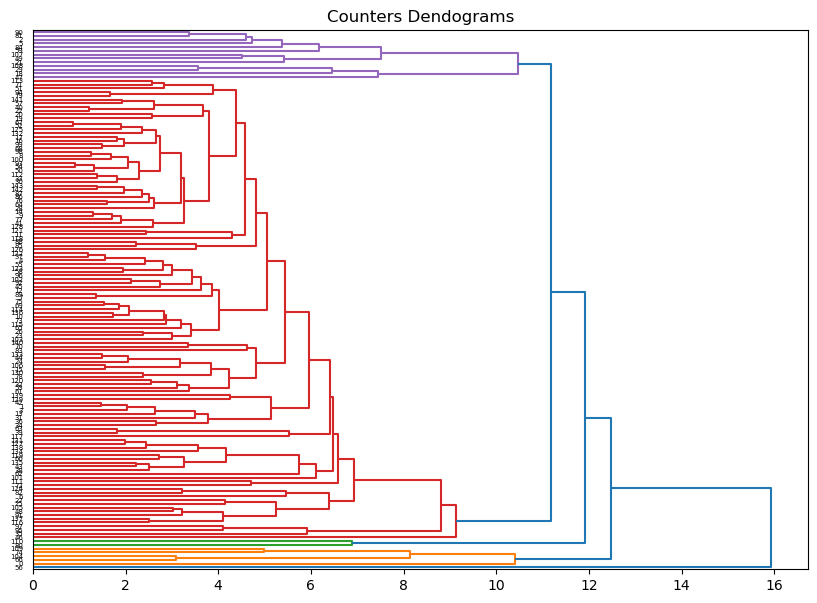

In [392]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= scaled_df , method="average" ,metric="euclidean" ),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

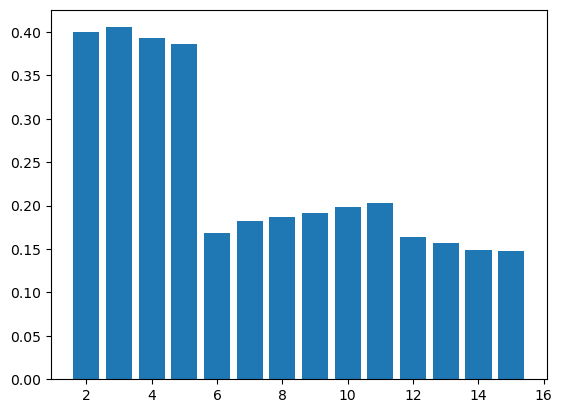

In [394]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for k in range(2, 16):
    silhouette_scores.append( 
        silhouette_score(scaled_df, AgglomerativeClustering(n_clusters = k).fit_predict(scaled_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15] 
plt.bar(k, silhouette_scores) 
plt.show() 


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 